In [9]:
import pandas as pd
import numpy as np
from pool import error_analysis
data = pd.read_csv('error_data_0.5_mm.csv', sep=' ',decimal='.')
data=data.dropna()     #drop all rows that have any NaN values
data

,real_point_id,reachable_pocket_id,estimated_point_id,C_x,C_y,T_x,T_y,P_x,P_y,X_x,...,X_calculated_x,X_calculated_y,Q_x,Q_y,d,b,a,alpha,beta,delta
0,0,0,0,554.749316,139.660216,313.808108,379.902737,38.447187,485.60708,349.284027,...,349.349316,366.455708,37.937212,484.278589,340.248636,294.952615,305.899500,0.050382,0.417417,1.423012
1,0,0,1,554.749316,139.660216,313.808108,379.902737,38.447187,485.60708,349.284027,...,349.343267,366.439731,37.984734,484.402384,340.248636,294.952615,305.899500,0.050382,0.417417,1.290409
2,0,0,2,554.749316,139.660216,313.808108,379.902737,38.447187,485.60708,349.284027,...,348.953063,365.451710,40.940240,492.101509,340.248636,294.952615,305.899500,0.050382,0.417417,6.956502
3,0,0,3,554.749316,139.660216,313.808108,379.902737,38.447187,485.60708,349.284027,...,349.107690,365.833638,39.793672,489.114688,340.248636,294.952615,305.899500,0.050382,0.417417,3.757171
4,0,0,4,554.749316,139.660216,313.808108,379.902737,38.447187,485.60708,349.284027,...,349.303625,366.335560,38.294782,485.210065,340.248636,294.952615,305.899500,0.050382,0.417417,0.425263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227575,8384,1,10,125.999099,316.500821,650.513800,213.490491,885.975309,485.60708,625.648933,...,624.419430,185.866518,897.853575,475.328858,534.534189,359.846579,516.727165,0.063885,1.051412,15.707803
227576,8384,1,11,125.999099,316.500821,650.513800,213.490491,885.975309,485.60708,625.648933,...,624.802826,185.509322,894.096036,478.580244,534.534189,359.846579,516.727165,0.063885,1.051412,10.738838
227577,8384,1,12,125.999099,316.500821,650.513800,213.490491,885.975309,485.60708,625.648933,...,627.466956,183.277199,869.174833,500.144472,534.534189,359.846579,516.727165,0.063885,1.051412,22.216925
227578,8384,1,13,125.999099,316.500821,650.513800,213.490491,885.975309,485.60708,625.648933,...,625.609557,184.788946,886.348406,485.284240,534.534189,359.846579,516.727165,0.063885,1.051412,0.493384


### Check a specific configuration

Each row of the dataset represents the resut a random shot with an error due to the vision system

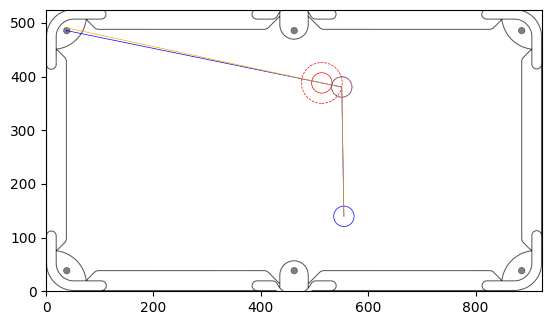

delta: 5.030657703855585


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pool.utils import Params
import os

params=Params()
path_to_repo=params.PATH_REPO
img = mpimg.imread(os.path.join(path_to_repo,'data','pool_table.png'))

#index
i=2468

#radii pool balls
r=38/2

#pool table dimensions
H=524
W=924

fig, ax = plt.subplots()
ax.set_xlim((0, W))
ax.set_ylim((0, H))

#pockets (unique values columns P_x and P_y)
pockets=data.groupby(['P_x','P_y']).count().reset_index().values[:,:2]

C=(data.iloc[i]['C_x'],data.iloc[i]['C_y'])
T=(data.iloc[i]['T_x'],data.iloc[i]['T_y'])
P=(data.iloc[i]['P_x'],data.iloc[i]['P_y'])
X=(data.iloc[i]['X_x'],data.iloc[i]['X_y'])
C_estimated=(data.iloc[i]['C_estimated_x'],data.iloc[i]['C_estimated_y'])
T_estimated=(data.iloc[i]['T_estimated_x'],data.iloc[i]['T_estimated_y'])
X_calculated=(data.iloc[i]['X_calculated_x'],data.iloc[i]['X_calculated_y'])
Q=(data.iloc[i]['Q_x'],data.iloc[i]['Q_y'])

ax=error_analysis.draw_specific_configuration(ax,W,H,img,pockets,r,C,T,P,X,C_estimated,T_estimated,X_calculated,Q)
ax.plot()  
plt.show()

print('delta:',data.iloc[i]['delta'])

### Dificulty of the shot

We divide our shots in 3 categories depending on the angle: the closest the angle is to 180 degrees, the better


In [11]:
data['difficulty_angle']=np.pi-data['alpha']-data['beta']
data.loc[(data['difficulty_angle']<np.pi) & (data['difficulty_angle']> (5/6)*np.pi), 'difficulty_category'] = 1
data.loc[(data['difficulty_angle']<(5/6)*np.pi) & (data['difficulty_angle']> (4/6)*np.pi), 'difficulty_category'] = 2
data.loc[(data['difficulty_angle']<(4/6)*np.pi) & (data['difficulty_angle']> (3/6)*np.pi), 'difficulty_category'] = 3

### Visualization of data

Scatter plots of some varaible vs delta

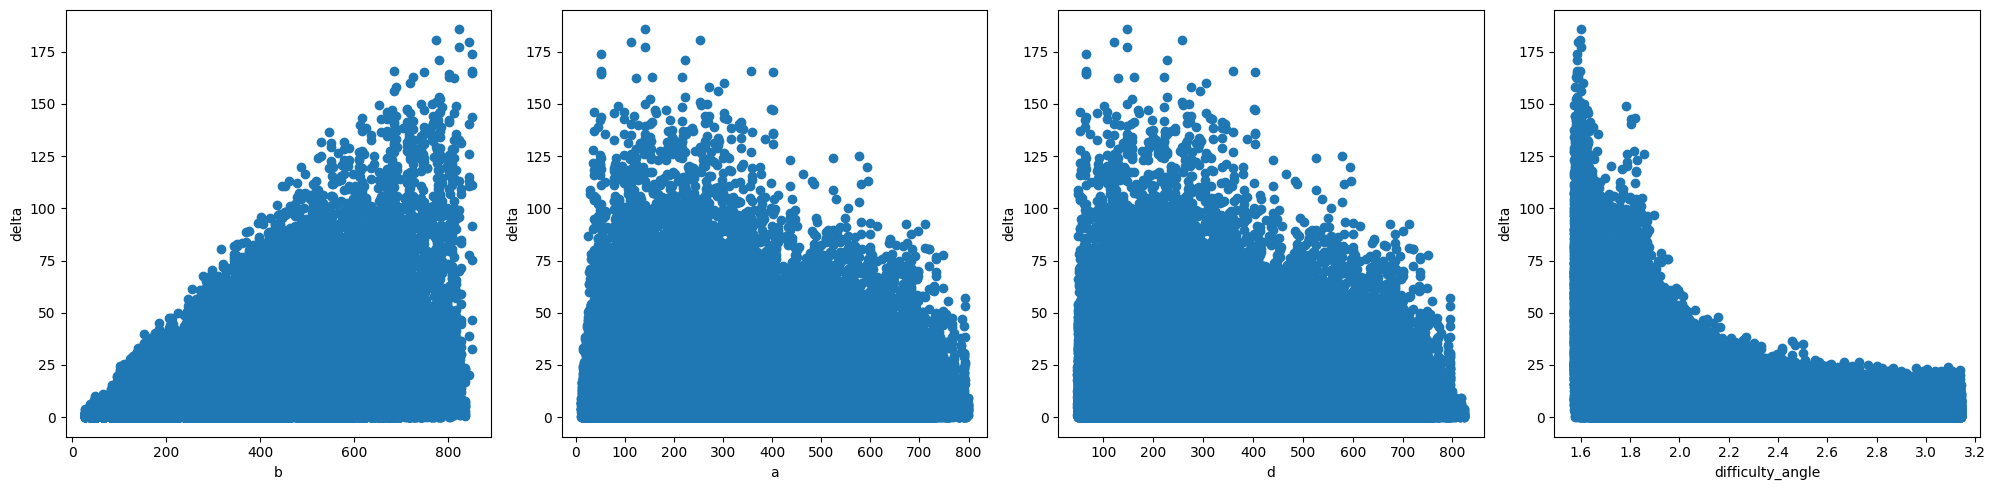

In [12]:
import numpy as np
import matplotlib.pyplot as plt

y = data['delta'].values
x=['b','a','d','difficulty_angle']

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for i,col_name in zip(range(1, columns*rows+1),x):

    x=data[col_name].values
    fig.add_subplot(rows, columns, i)
    plt.scatter(x, y)
    plt.xlabel(col_name)
    plt.ylabel('delta')

plt.tight_layout()
plt.show()

Histograms of delta and its categories

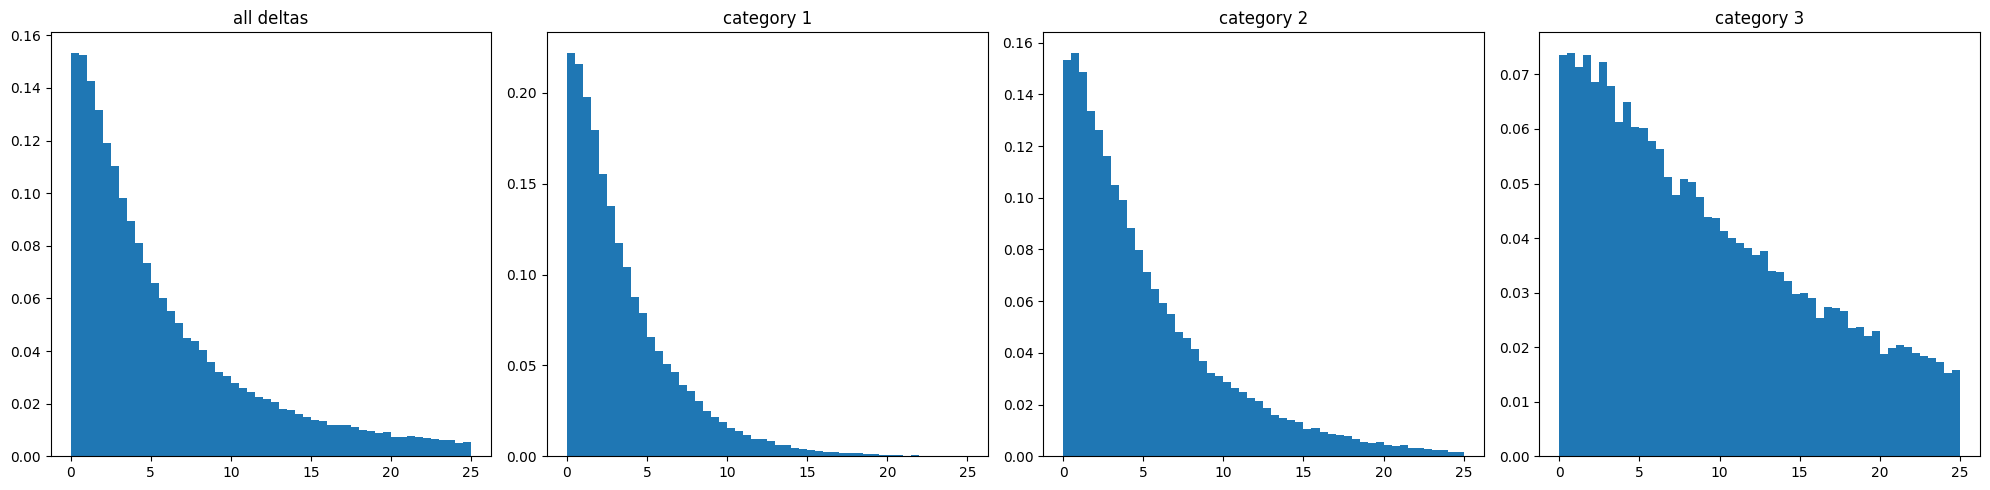

In [13]:
import numpy as np
import matplotlib.pyplot as plt

deltas=data['delta'].values
deltas_category1=data[data['difficulty_category']==1]['delta'].values
deltas_category2=data[data['difficulty_category']==2]['delta'].values
deltas_category3=data[data['difficulty_category']==3]['delta'].values
list_deltas=[deltas,deltas_category1,deltas_category2,deltas_category3]

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for category,i,delta_type in zip(['all deltas', 'category 1', 'category 2', 'category 3'],range(1, columns*rows+1),list_deltas):

    fig.add_subplot(rows, columns, i)
    plt.title(category)
    plt.hist(delta_type, bins=50,range=[0, 25], density=True)

plt.tight_layout()
plt.show()


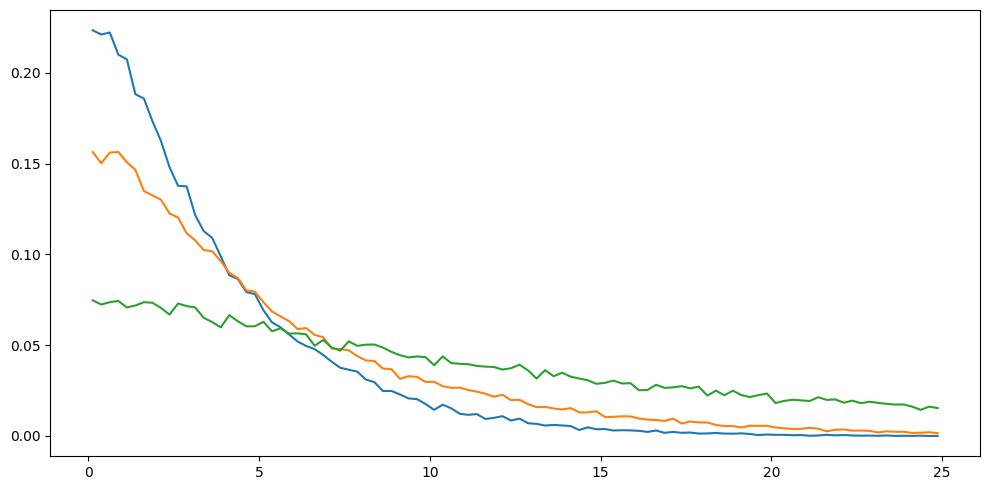

In [14]:
fig = plt.figure(1,figsize=(10, 5))

n,x=np.histogram(deltas_category1, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category2, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category3, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

plt.tight_layout()
plt.show()


### Probability of getting an error below a certain threshold

probability of error below 10mm:  0.9428264934839017


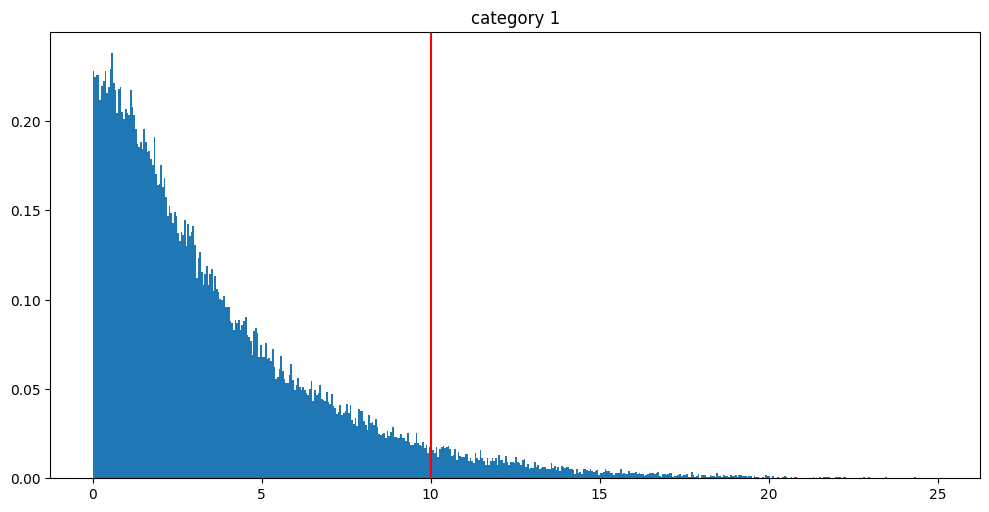

probability of error below 10mm:  0.8443142361111111


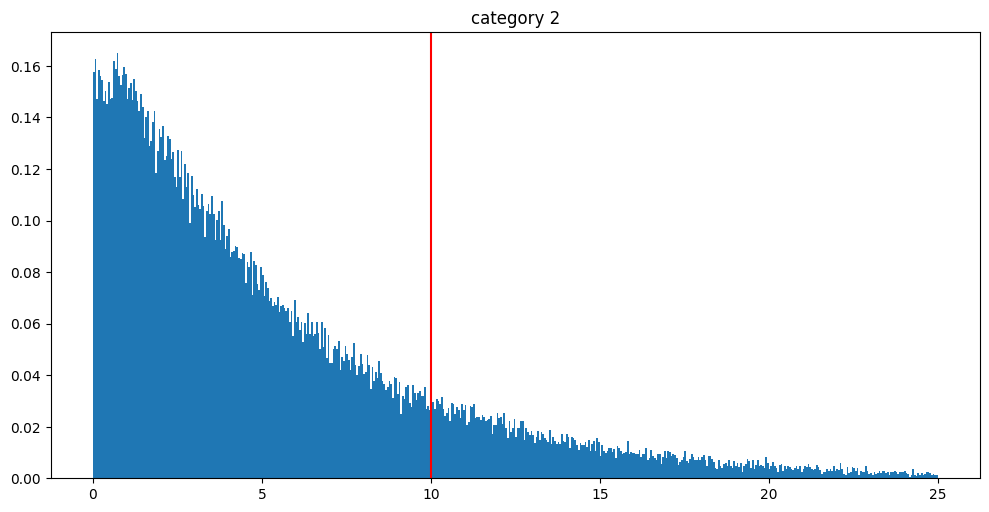

probability of error below 10mm:  0.5966812551749776


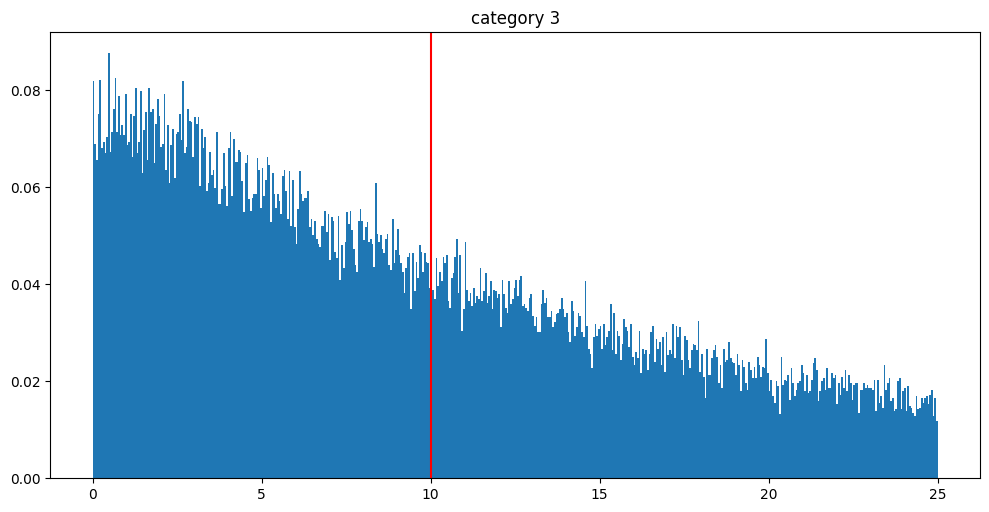

In [15]:
threshold=10
num_bins=500

for category,deltas_category in enumerate([deltas_category1,deltas_category2,deltas_category3]):
    arr_pdf,arr_bins=np.histogram(deltas_category, bins = num_bins,range=[0, 25],density=True)

    #in order to match dimensions of bins and pdf arrays we get rid of last bins element
    arr_bins_cropped=arr_bins[:-1]
    arr_bins_thresholded=arr_bins_cropped[arr_bins_cropped<threshold]

    #in order to have the same dimension between _pdf and np.diff(_bins), _bins need to have one 
    #more element than _pdf (i.e., _pdf need to have one less element than _bins)
    arr_pdf_thresholded=arr_pdf[arr_bins_cropped<threshold][:-1]
    area=np.sum(arr_pdf_thresholded* np.diff(arr_bins_thresholded))
    print(f'probability of error below {threshold}mm: ', area)

    #plot computed probability
    fig = plt.figure(1,figsize=(10, 5))
    plt.hist(deltas_category, bins = num_bins, range=[0, 25],density=True)
    plt.axvline(x=threshold, color='r')
    plt.tight_layout()
    plt.title(f'category {category+1}')
    plt.show()
